# Розв'язання нелінійних рівнянь
Комп’ютерний практикум №1

*Шкаліков Олег*

In [ ]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial

from matplotlib import pyplot as plt
from matplotlib import animation

from IPython.display import HTML

Основна задача даного лабораторного практикуму полягає у тому,
щоб дослідити методи розв'язання нелінійних рівнянь:

$$
    f(x) = 0
$$
, де $f(x)$ - неперервна, та для деяких методів дифференційовна функція.
Розв'язання даної задачі вимагає виконання 2 етапів:

1. Відокремлення коренів - визначення проміжків $[a_i, b_i]$, у
яких знаходиться лише 1 корінь.
2. Уточнення кореня у кожному з проміжків, знайденних на попередному етапі.

Для поліномів, тобто функції вигляду:
$$  f(x) = \sum\limits_{i=0}^n a_n x^n = a_0 + a_1x + \dots + a_nx^n $$
задача значно спрощується, бо мають місце теореми, які дозволяють
оцінити значення коренів рівняння та відділити їх.

У 6 варіанті пропунується знайти корені наступного рівняння:

$$ P(x) = 2x^3 - 4x^2 - x + 2 = 0 $$

In [ ]:
poly = Polynomial([2,-1,-4,2])

## Відокремлення коренів

**Теорема** (про границі усіх коренів рівняння)

Нехай $A = \max |a_i|, i = \overline{0, n-1}$ та
$A = \max |a_i|, i = \overline{1, n}$.
Тоді всі корені рівняння лежать у кільці:

$$ \frac{|a_0|}{B + |a_0|} \leq |x| \leq \frac{|a_n|+A}{|a_n|} $$

In [ ]:
def roots_module_bounds(polynomial):
    coeffs = polynomial.coef

    A = np.max(np.abs(coeffs[:-1]))
    B = np.max(np.abs(coeffs[1:]))
    a0 = np.abs(coeffs[0])
    an = np.abs(coeffs[-1])

    return a0 / (B + a0), (an + A) / an

In [ ]:
roots_module_bounds(poly)

(0.3333333333333333, 3.0)

**Теорема** (Гюа)
Якщо
$ \exists k \in \overline{1, n-1} \; : a^2_k < a_{k-1} a_{k+1} $
,то рівняння має хоча б одну пару комплексноспряжених коренів.

In [ ]:
def is_gua_satisfied(polynomial):
    coeffs = polynomial.coef    
        
    for i in range(1, len(coeffs)-1):
        if coeffs[i]**2 < coeffs[i-1] * coeffs[i+1]:
            return True

    return False

In [ ]:
is_gua_satisfied(poly)

False

**Теорема** (про верхню межу додатніх коренів)

Нехай $B = \max |a_i|, a_i < 0$ та
$m = \max i, a_i < 0 $.
Тоді верхня межа додатніх коренів рівняння:

$$ R = 1 + \sqrt[n-m]{\frac{B}{a_n}} $$

Очевидно що, якщо обрахувати значення $R_1$, $R_2$, $R_3$ та $R_4$,
вважаючи за аргумент вирази $x$, $\dfrac{1}{y}$, $-\dfrac{1}{y}$, $-y$, то
будуть мати місце наступні оцінки:

$$
    \frac{1}{R_2} \leq x^{+} \leq R_1 \hspace{1cm}
    -R_4 \leq x^{-} \leq -\frac{1}{R_3}
$$

In [ ]:
def real_roots_bounds(polynomial):
    coeff = polynomial.coef.copy()
    deg = polynomial.degree()    

    def lagrange_bound(coeffs):
        if coeffs[-1] < 0:
            coeffs = -coeffs
        n = len(coeffs) - 1               

        for i, c in enumerate(coeffs[::-1]):
            if c < 0:
                m = n - i
                break               
        
        B = np.max(-coeffs)
        return 1 + (B/coeffs[-1])**(1/(n-m))
    
    pos_upper = lagrange_bound(coeff)
    pos_lower = 1 / lagrange_bound(coeff[::-1])
    
    neg_ind = range(0, deg, 2)
    neg_coeffs = coeff
    neg_coeffs[neg_ind] = -coeff[neg_ind]    
    neg_lower = -lagrange_bound(neg_coeffs)
    neg_upper = -1 / lagrange_bound(neg_coeffs[::-1])
    
    return neg_lower, neg_upper, pos_lower, pos_upper

In [ ]:
real_roots_bounds(poly)

(-2.0, -0.4142135623730951, 0.3333333333333333, 3.0)

**Наслідок** (Спосіб Лагранжа)

Нехай $f(x) = F(x) + H(x)$, причому $F(x)$ містить усі поспіль старші члени $f$ з $a_i > 0$, а також усі члени, для яких $a_i < 0$, а $H(x)$ усі інші члени. Тоді, якщо існує таке $\alpha>0$, що $F(\alpha) > 0$, то для коренів $x_r$ рівняння $f$ виконується: $x_r < \alpha$

In [ ]:
def lagrange(polynomial):
    coeffs = polynomial.coef
    mask = coeffs > 0
    for i, c in enumerate(mask[::-1]):
        if c == True:
            mask[coeffs.shape[0] - i - 1] = False
        else:
            break
    H_coeffs = np.zeros(coeffs.shape)
    H_coeffs[mask] = coeffs[mask]    
    H = Polynomial(H_coeffs)

    F_coeffs = coeffs.copy()
    F_coeffs[mask] = 0
    F = Polynomial(F_coeffs)
    return F, H

In [ ]:
F, H = lagrange(poly)
display(F)
display(H)

F(2.5)

Polynomial([ 0., -1., -4.,  2.], domain=[-1,  1], window=[-1,  1])

Polynomial([2., 0., 0., 0.], domain=[-1,  1], window=[-1,  1])

3.75

**Теорема** (Штурма)

Нехай $f(x) = P_n(x)$ поліном без кратних коренів. Утворимо послідовність
многочленів:

$$
    p_0(x) = f(x) \hspace{1cm}
    p_1(x) = f^{'}(x) \hspace{1cm}
    p_{i+1} = - (p_{i-1} \mod{p_i})
$$

Тоді кількість дійсних коренів полінома $f(x)$ на довільному відрізку $[a, b]$
дорівнює різниці між кількістю змін знаку у цій послідовності при $x=a$ та $x=b$.

**Наслідок**

Всі корені рівняння $f(х)=0$ є дійсними тоді і тільки тоді, коли
1. Коли система поліномів Штурма має максимальну кількість елементів.
2. Виконано нерівність $p_k (\infty)>0$ для всіх $k$

In [ ]:
def sturm_seq(polynomial):
    series = []
    series.append(polynomial)
    series.append(polynomial.deriv())

    while series[-1].degree() > 0:
        pk = -(series[-2] % series[-1])
        series.append(pk)

    return series

In [ ]:
def calculate_sign_change(sturm_series, x):
    p_values = [p(x) for p in sturm_series]
    counter = 0

    for i in range(1, len(p_values)):
        if p_values[i]*p_values[i-1] < 0:
            counter += 1

    return counter

In [ ]:
def calculate_roots(polynomial, a, b):
    assert a < b
    st_seq = sturm_seq(polynomial)
    schg_a = calculate_sign_change(st_seq, a)
    schg_b = calculate_sign_change(st_seq, b)
    return np.abs(schg_a - schg_b)

Побудуємо послідовність Штурма для нашого полінома.

In [ ]:
for p in sturm_seq(poly):     
    display(p)

Polynomial([ 2., -1., -4.,  2.], domain=[-1,  1], window=[-1,  1])

Polynomial([-1., -8.,  6.], domain=[-1.,  1.], window=[-1.,  1.])

Polynomial([-1.77777778,  2.44444444], domain=[-1.,  1.], window=[-1.,  1.])

Polynomial([3.6446281], domain=[-1.,  1.], window=[-1.,  1.])

Отримали послідовність з максимальною кількістю елементів, причому 
$\forall k \in \overline{0, 3} \;\;\; p_k(\infty)>0$. А отже, за наслідком з теореми Штурма, усі корені полінома дійсні. Тепер визначимо проміжки, на яких буде лише один корінь.

In [ ]:
calculate_roots(poly, -2, -0.4)

1

In [ ]:
calculate_roots(poly, 0.3, 2.5)

2

In [ ]:
calculate_roots(poly, 0.3, 1.5)

1

In [ ]:
calculate_roots(poly, 1.5, 2.5)

1

## Уточнення коренів

In [ ]:
def create_anim(hist):
    def tick(i):
        points.set_data(hist[i], poly(hist[i]))
        text.set_text(i)
        return points,
    
    return animation.FuncAnimation(fig, tick, frames=len(hist), interval=400)

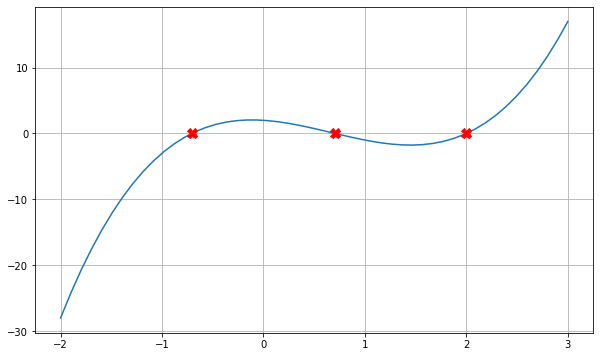

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
t = np.linspace(-2, 3)
ax.plot(t, poly(t))

xnum = poly.roots()
ax.plot(xnum, poly(xnum), 'X', c='red', markersize=10)
plt.grid()

text = ax.text(-2, 15,'', fontsize=18)
points, = ax.plot([], [], 'o', markersize=8)

In [ ]:
def bisection(f, a, b, epsilon=10**-5):
    assert f(a)*f(b) <= 0
    assert epsilon > 0

    range_hist = [(a, b)]
    while not np.abs(b-a) <= epsilon:
        c = (a + b) / 2
        fc = f(c)
        if fc * f(a) > 0:
            a = c
        else:
            b = c
        range_hist.append((a, b))
    
    c = (a + b) / 2
    hist = np.asarray(range_hist)
    return c, hist

In [ ]:
x, hist = bisection(poly, -2, -0.4)
print(f"x = {x}")

x = -0.7071075439453125


In [ ]:
HTML(create_anim(hist).to_html5_video())

In [ ]:
def newton(f, x0, df, epsilon=10**-5, c=1):
    assert epsilon > 0

    xk = x0
    fk = f(x0)
    x_hist = [x0]

    while not np.abs(fk) <= epsilon:
        xk = xk - c * fk / df(xk)
        fk = f(xk)
        x_hist.append(xk)

    return xk, np.asarray(x_hist)

def df(f, x, delta=10**-6):
    return (f(x + delta) - f(x))/delta

In [ ]:
x, hist = newton(poly, 0.3, lambda x: poly.deriv()(x))
print(f"x = {x}")

x = 0.7071067138532653


In [ ]:
HTML(create_anim(hist).to_html5_video())

In [ ]:
def secant(f, a, b, epsilon=10**-5):
    assert epsilon > 0
    assert f(a)*f(b) <= 0

    range_hist = [(a, b)]
    fc = epsilon + 1 #for first check

    while not np.abs(fc) <= epsilon:
        fa = f(a)
        fb = f(b)
        
        c = (a*fb - b*fa) / (fb-fa)
        fc = f(c)        
        
        if fc * fa > 0:
            a = c
        else:
            b = c
        
        range_hist.append((a, b))
    
    hist = np.asarray(range_hist[:-1])
    return c, hist

In [ ]:
x, hist = secant(poly, 1.5, 2.5)
print(f"x = {x}")

x = 1.9999993066836033


In [ ]:
HTML(create_anim(hist).to_html5_video())